# Exploratory Data Analysis Report

**Authors**: Ysais Martinez and Brian Benedicks  
**Date**: 24 SEP 2024 
**Dataset Reference**: The dataset used for this analysis comes from a series of health sensors capturing metrics like heart rate, sleep, and blood pressure, collected via multiple sources. It was ued to find datatrends in health from welltory data

---

## 1. Data Context and Sampling

The dataset consists of multiple files, each capturing different health metrics for participants, such as heart rate variability (HRV), sleep quality, blood pressure, and self-reported mood scores. The primary goal of this analysis is to explore relationships between these metrics and evaluate overall health trends.

- **Sampling**: Each participant’s data is tied together using a unique `user_code` identifier; we were able to use this to merge the data
  
- **Files in Dataset**:  
  - `participants.csv`: Metadata of participants (age, gender, etc.)  
  - `hrv_measurements.csv`: Heart rate variability data  
  - `sleep.csv`: Sleep duration and quality metrics  
  - `blood_pressure.csv`: Blood pressure readings  
  - `heart_rate.csv`: Heart rate measurements

## 2. Key Components of Data Quality Assessment

- **Data Profiling**: The dataset was thoroughly reviewed for its structure and content, identifying key variables and understanding distributions across them.
  
- **Data Completeness**: We found several columns with missing values, notably in the sleep-related metrics, and chose to drop entirely empty columns while imputing missing values in the remaining data.

- **Data Accuracy**: We cross-checked key health variables, such as heart rate and blood pressure, against typical human physiological ranges to ensure the data was accurate and reliable for further analysis.

- **Data Consistency**: Formatting issues, especially with dates and times, were addressed to ensure that all variables used consistent units and formats throughout the dataset.

- **Data Integrity**: Duplicate records were removed, and key relationships (e.g., between heart rate, blood pressure, and user identifiers) were verified to maintain the dataset's overall integrity.

- **Data Lineage and Provenance**: Since the dataset was collected from various sensors and sources, we documented the origin of each file and ensured all timestamp-based variables were correctly synchronized for proper analysis.



## 3. Running the Report

This report includes code snippets for performing data analysis, but for the best results, ensure the following:

- The dataset files (`participants.csv`, `hrv_measurements.csv`, etc.) are available in the working directory.
- Required Python packages are installed, including `pandas`, `matplotlib`, `seaborn`, and `scikit-learn`.




## 4. Data Context and Sampling Details

The dataset provides various health metrics for participants, tracked over different timeframes. The primary goal of the exploratory data analysis (EDA) is to determine if there are any relationships between the various types of health metrics measured.
- **Key Variables**: 
  - Heart Rate (bpm)
  - Blood Pressure (systolic/diastolic)
  - Sleep Quality Scores
  - HRV (Heart Rate Variability)


**Explore Data Structure and Descriptive Statistics**

**Let's explore the structure of the dataset, checking for column types, ranges, and summary statistics.**



In [14]:
# Display dataset info and basic statistics
print(df_main.info())
print(df_main.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 5 non-null      object 
 1   gender                    5 non-null      object 
 2   age_range                 5 non-null      object 
 3   city                      5 non-null      object 
 4   country                   5 non-null      object 
 5   height                    5 non-null      float64
 6   weight                    5 non-null      float64
 7   symptoms_onset            2 non-null      object 
 8   rr_code                   5 non-null      object 
 9   measurement_datetime_x    5 non-null      object 
 10  time_of_day               5 non-null      object 
 11  bpm                       5 non-null      int64  
 12  meanrr                    5 non-null      float64
 13  mxdmn                     5 non-null      float64
 14  sdnn          

## The dataset contains 50 columns and 5 entries, providing participant details such as age, gender, heart rate, and blood pressure. Some values, particularly sleep and pulse measurements, are missing in a few places, but most of the data looks normal.

# Data Quality Assessment

We will assess the data for:

- **Missing Values**: How many values are missing and from which columns?
- **Duplicates**: Are there any duplicate rows in the dataset?
- **Outliers**: Identifying outliers in numerical data using IQR (Interquartile Range) or Z-scores.




In [16]:

# Check for missing values
print("Missing values:\n", df_main.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", df_main.duplicated().sum())

# Outlier detection using IQR (for numeric columns only)
numeric_columns = df_main.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = df_main[numeric_columns].quantile(0.25)
Q3 = df_main[numeric_columns].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Filter out outliers based on the IQR
outliers = ((df_main[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_main[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

print("Outliers in dataset:\n", outliers)


Missing values:
 user_code                   0
gender                      0
age_range                   0
city                        0
country                     0
height                      0
weight                      0
symptoms_onset              3
rr_code                     0
measurement_datetime_x      0
time_of_day                 0
bpm                         0
meanrr                      0
mxdmn                       0
sdnn                        0
rmssd                       0
pnn50                       0
mode                        0
amo                         0
lf                          0
hf                          0
vlf                         0
lfhf                        0
total_power                 0
how_feel                    0
how_mood                    0
how_sleep                   4
tags                        1
rr_data                     0
day                         0
sleep_begin                 0
sleep_end                   0
sleep_duration         

## Data Quality Results

- **Missing Values**: Some columns have missing data, especially in sleep and mood measurements, along with a few health readings.
- **Duplicates**: No duplicate rows were found. Duplicates were already handled and removed earlier in the code.
- **Outliers**: There are a few outliers in health measurements like heart rate and blood pressure, based on the IQR method.


## Handling Missing Values, Duplicates, and Outliers



- **Missing Values**: We can fill missing values w the median, mean, or a constant, or remove them entirely.
- **Duplicates**: Remove duplicates if necessary.
- **Outliers**: Remove or cap the outliers based on the business understanding of the data.



In [20]:
# Handling missing values 
numeric_columns = df_main.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns
df_main[numeric_columns] = df_main[numeric_columns].fillna(df_main[numeric_columns].median())

# Remove duplicates 
df_main.drop_duplicates(inplace=True)

df_main.info()  # Show dataset info after filling missing values and removing duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_code                 5 non-null      object 
 1   gender                    5 non-null      object 
 2   age_range                 5 non-null      object 
 3   city                      5 non-null      object 
 4   country                   5 non-null      object 
 5   height                    5 non-null      float64
 6   weight                    5 non-null      float64
 7   symptoms_onset            2 non-null      object 
 8   rr_code                   5 non-null      object 
 9   measurement_datetime_x    5 non-null      object 
 10  time_of_day               5 non-null      object 
 11  bpm                       5 non-null      int64  
 12  meanrr                    5 non-null      float64
 13  mxdmn                     5 non-null      float64
 14  sdnn          

## **Now that we've handled missing, duplicate and outlier data, let's move on.**

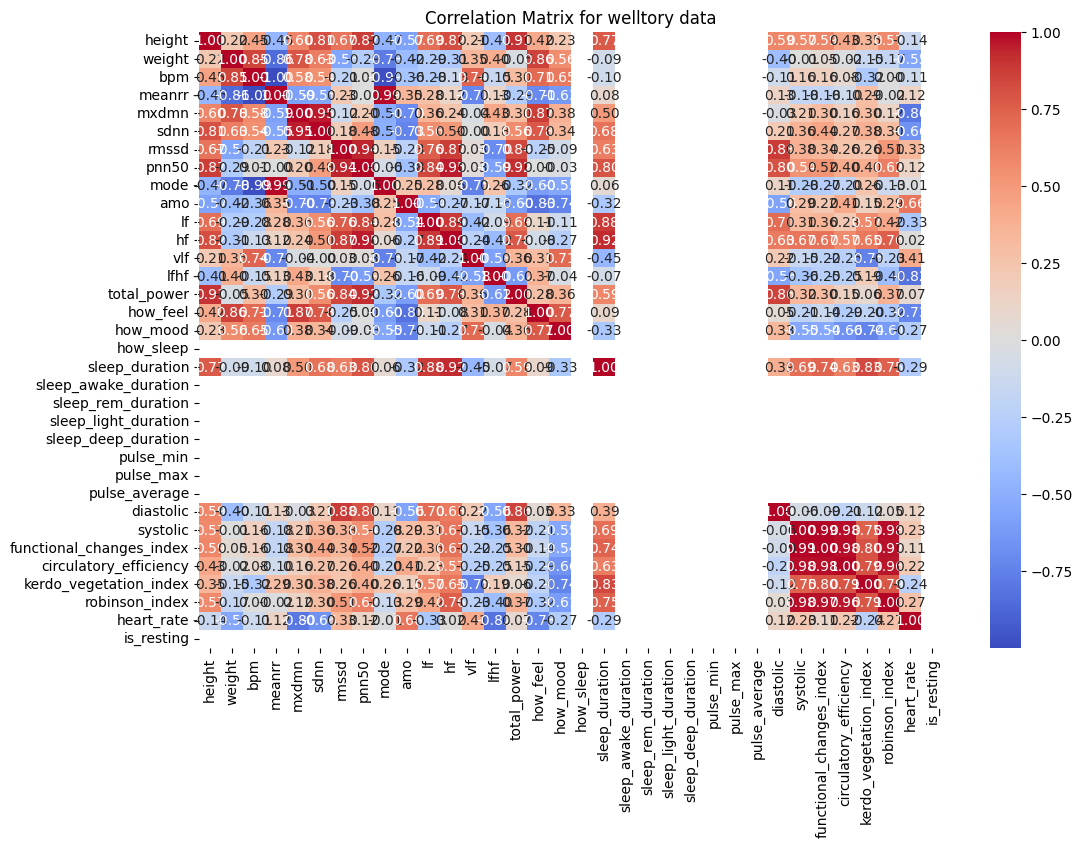

In [23]:
# Correlation Matrix and Heatmap

# Calculate correlation matrix for numeric columns
corr_matrix = df_main[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for welltory data")
plt.show()



# Generate pair plot for selected numeric columns
sns.pairplot(df_main[numeric_columns])
plt.suptitle("Pair Plot of Numeric Variables", y=1.02)
plt.show()


## Visualizing Variable Relationships

We explored the relationships between variables using two key visualizations:

- **Correlation Matrix**: A heatmap was created to show the correlation between numeric variables, illustrating how strongly they are related (both positively and negatively). We were interested to see how sleep and mood high a high correlation! It comes as no surprise however. 
  
- **Pair Plot**: Scatterplots for each pair of numeric variables were generated to visually inspect their relationships and distributions, helping us to spot trends, clusters, or outliers.


##  Feature Engineering: Cardiac and Sleep Scores

We created two new features to help us better understand participants' health:

- **Cardiac Health Score**: This score combines heart rate and blood pressure (systolic and diastolic) to give an idea of overall heart health.
- **Sleep Quality Score**: This score looks at how long participants slept, how much REM sleep they had, and how often they woke up to give an overall measure of sleep quality.


In [24]:
# cardiac_health_score
df_main['cardiac_health_score'] = df_main['heart_rate'] * df_main['systolic'] / df_main['diastolic']

#  sleep_quality_score
df_main['sleep_quality_score'] = df_main['sleep_duration'] - df_main['sleep_awake_duration'] + df_main['sleep_rem_duration'].fillna(0)

# Check the new features
df_main[['heart_rate', 'systolic', 'diastolic', 'cardiac_health_score', 'sleep_duration', 'sleep_awake_duration', 'sleep_rem_duration', 'sleep_quality_score']].head()


,heart_rate,systolic,diastolic,cardiac_health_score,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_quality_score
0,90,127,82,139.390244,3290.0,NaN,NaN,NaN
1,63,132,66,126.000000,9543.0,NaN,NaN,NaN
2,98,126,77,160.363636,3600.0,NaN,NaN,NaN
3,88,157,82,168.487805,26700.0,NaN,NaN,NaN
4,63,122,89,86.359551,18720.0,NaN,NaN,NaN


## 7. Dimensionality Reduction with PCA

To reduce the complexity of our data, we used Principal Component Analysis (PCA). This helps to capture most of the important information


Total missing values after imputation: 0
Explained Variance by Component: [0.35775393 0.29814464]


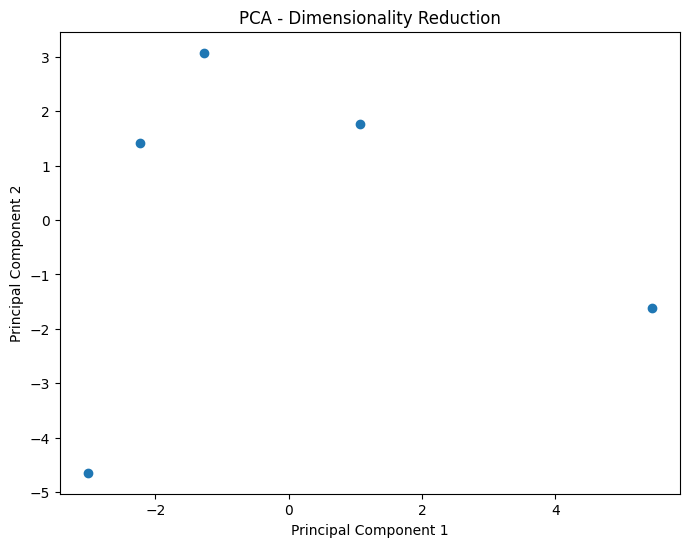

In [32]:
import numpy as np  # Make sure NumPy is imported

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select only the numeric columns for PCA
numeric_columns = df_main.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_main[numeric_columns]

# 1. Remove columns with no observed values
df_numeric = df_numeric.drop(columns=['sleep_awake_duration', 'sleep_rem_duration', 'sleep_quality_score'], errors='ignore')

# 2. Use SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='median')
df_numeric_imputed = imputer.fit_transform(df_numeric)

# 3. Check for NaN values after imputation (this should return 0)
print("Total missing values after imputation:", np.isnan(df_numeric_imputed).sum())

# 4. Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_imputed)

# 5. Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# 6. Add the principal components to the original dataframe
df_main['PCA1'] = pca_result[:, 0]
df_main['PCA2'] = pca_result[:, 1]

# 7. Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Component: {explained_variance}")

# 8. Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(df_main['PCA1'], df_main['PCA2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Dimensionality Reduction')
plt.show()



